In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

In [2]:
def plot_profiling_bar(file):
    bar_width = 0.2  # Largura das barras
    step = file['step']
    least_square = file['leastSquare']
    coeff_of_determination = file['coefficientOfDetermination']
    inliers_outliers_memory = file['inliersOutliersMemory']
    inliers_outliers = file['inliersOutliers']

    # Calcula o deslocamento horizontal para posicionar as barras lado a lado
    x_pos_least_square = step - 1.5 * bar_width
    x_pos_coeff_of_determination = step - 0.5 * bar_width
    x_pos_inliers_outliers = step + 0.5 * bar_width

    plt.bar(x_pos_least_square, least_square, width=bar_width, label='leastSquare')
    plt.bar(x_pos_coeff_of_determination, coeff_of_determination, width=bar_width, label='coefficientOfDetermination')
    plt.bar(x_pos_inliers_outliers, inliers_outliers, width=bar_width, label='inliersOutliers')

    plt.xticks(step)
    plt.xlabel('Step')
    plt.ylabel('Valor')
    plt.legend()

    plt.show()

# Exemplo de uso:
# Supondo que você tenha um DataFrame chamado 'profiling_data' contendo os dados
# com colunas 'step', 'leastSquare', 'coefficientOfDetermination', 'inliersOutliersMemory', 'inliersOutliers'
# plot_profiling_bar(profiling_data)

In [3]:
def FPGAout_read(filename):
    data = []
    columns = ['step', 'model', 'bestfit', 'inliers', 'angle', 'distance']

    with open(filename, 'r') as file:
        while True:
            result = {}
            test_case = file.readline().strip()
            if not test_case:
                break
            result['step'] = int(test_case)
            result['model'] = list(map(float, file.readline()[1:-2].split(',')))
            result['bestfit'] = float(file.readline().strip())
            result['inliers'] = int(file.readline().strip())
            result['angle'] = float(file.readline().strip())
            result['distance'] = float(file.readline().strip())
            file.readline()
            data.append(result)

    return pd.DataFrame(data, columns=columns)

In [4]:
path = 'resultados'

In [5]:
padrao_arquivos = os.path.join(path, '*.csv')  # define o padrão para listar todos os arquivos na pasta
lista_arquivos = glob.glob(padrao_arquivos)
lista_arquivos

['resultados/Profiling_O.csv',
 'resultados/Profiling_HFP.csv',
 'resultados/Profiling.csv']

In [6]:
Profiling = pd.read_csv(lista_arquivos[2])
Profiling_HFP = pd.read_csv(lista_arquivos[1])
Profiling_O = pd.read_csv(lista_arquivos[0])
Profiling_diff = Profiling_HFP - Profiling_O
Profiling_diff['step'] = [0,1,2,3,4,5,6,7,8,9,10,11,12,13] #ajusta valores da coluna step
Profiling_diff

,step,square_root,calculateIntersection,getAngleFromModel,leastSquare,coefficientOfDetermination,inliersOutliersMemory,inliersOutliers,squareDistanceBetweenPoints
0,0,0,0,0,0,0,33048,0,0
1,1,0,-66,857,367552,-8442,32184,79730,-90
2,2,0,0,0,0,0,33480,0,0
3,3,0,-66,1801,277578,-5600,33912,47600,-84
4,4,0,0,0,0,0,33048,0,0
5,5,0,0,0,0,0,32832,0,0
6,6,0,-66,1870,861886,-20300,47520,172550,-72
7,7,0,0,0,0,0,43632,0,0
8,8,0,-66,1449,355728,-9310,29160,113050,-78
9,9,0,0,0,0,0,43848,0,0


In [7]:
Profiling_O.loc[6]

step                                6
square_root                      1175
calculateIntersection             327
getAngleFromModel              212836
leastSquare                    589610
coefficientOfDetermination     668410
inliersOutliersMemory          105534
inliersOutliers                688204
squareDistanceBetweenPoints     20792
Name: 6, dtype: int64

In [8]:
Profiling_HFP.loc[6]

step                                 6
square_root                       1175
calculateIntersection              261
getAngleFromModel               214706
leastSquare                    1451496
coefficientOfDetermination      648110
inliersOutliersMemory           153054
inliersOutliers                 860754
squareDistanceBetweenPoints      20720
Name: 6, dtype: int64

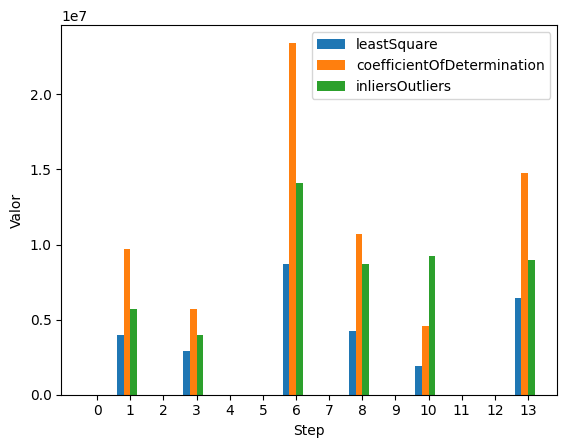

In [9]:
# sem otimização
plot_profiling_bar(Profiling)

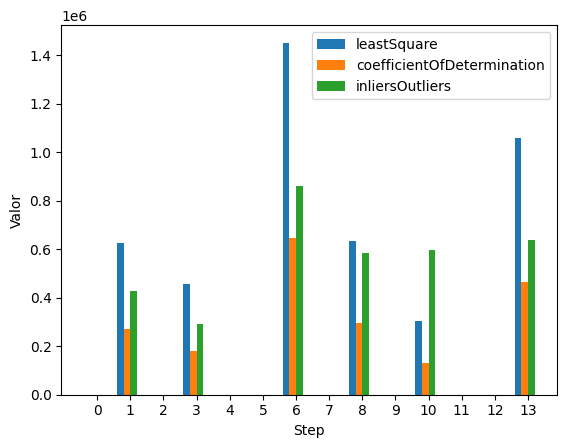

In [10]:
# com otimização de hardware em ponto flutuante
plot_profiling_bar(Profiling_HFP)

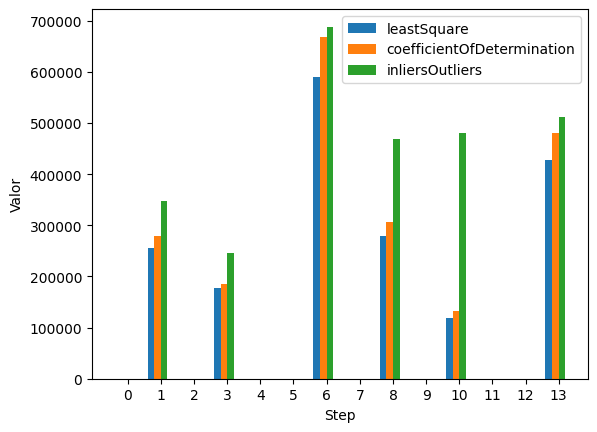

In [11]:
# com otimização de pacotamento de dados e diminuição de acesso à memória
plot_profiling_bar(Profiling_O)

In [12]:
txt_file = os.path.join(path, 'FPGAout*')  # define o padrão para listar todos os arquivos na pasta
out = glob.glob(txt_file)
out

['resultados/FPGAout.txt',
 'resultados/FPGAout-PC.txt',
 'resultados/FPGAout_O.txt',
 'resultados/FPGAout_HFP.txt']

In [13]:
FPGA_out_PC = FPGAout_read(out[1])
FPGA_out_PC

,step,model,bestfit,inliers,angle,distance
0,0,"[0.0, 25.0]",inf,0,0.000000,50.000000
1,1,"[1.849611391923474, -9.072286537311804]",0.153965,56,-1.075157,18.421322
2,2,"[0.0, 25.0]",inf,0,-1.075157,50.000000
3,3,"[0.4267146348356053, 15.852611933824722]",0.361517,28,-1.478479,21.436781
4,4,"[0.0, 25.0]",inf,0,-1.478479,50.000000
5,5,"[0.0, 25.0]",inf,0,-1.478479,50.000000
6,6,"[-0.7649217947693504, 34.272184980922894]",0.054745,114,-0.825496,12.121742
7,7,"[0.0, 25.0]",inf,0,-0.825496,50.000000
8,8,"[1.1687408622449298, 24.289339978544156]",0.133508,85,-1.688544,0.608056
9,9,"[0.0, 25.0]",inf,0,-1.688544,50.000000


In [14]:
FPGA_out_NIOS = FPGAout_read(out[0])
FPGA_out_NIOS

,step,model,bestfit,inliers,angle,distance
0,0,"[0.0, 25.0]",inf,153,0.000000,50.000000
1,1,"[1.9253, -11.349117]",0.115460,67,-1.091750,18.141445
2,2,"[0.0, 25.0]",inf,155,0.000000,50.000000
3,3,"[0.481072, 12.98444]",0.236668,40,-0.448391,24.021948
4,4,"[0.0, 25.0]",inf,153,0.000000,50.000000
5,5,"[0.0, 25.0]",inf,152,0.000000,50.000000
6,6,"[-0.770371, 33.592865]",0.029266,145,0.656412,11.000189
7,7,"[0.0, 25.0]",inf,202,0.000000,50.000000
8,8,"[1.203124, 23.710875]",0.116742,95,-0.877336,1.416667
9,9,"[0.0, 25.0]",inf,203,0.000000,50.000000
